# Итоговая работа.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import itertools

from scipy.misc import derivative
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy import linalg

%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
# Подсчет косинуса угла между векторами a, b по их координатам

def cosine( a, b ):
  
    aLength = np.linalg.norm( a )              # длины векторов
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [4]:
cosinus_max = 0
k = 0
a1 = []

for i in raitings:
    next_user_stats = i
    for j in raitings:
        if (i != j).any():
            cosine_ab = cosine(next_user_stats, j)
            if cosine_ab >= cosinus_max:
                cosinus_max = cosine_ab
                k = j
    a1.append([np.where((raitings == next_user_stats).all(axis=1))[0][0], np.where((raitings == k).all(axis=1))[0][0]]) #, cosinus_max]) 
    
print(a1)

[[0, 8], [1, 8], [2, 9], [3, 9], [4, 9], [5, 9], [6, 9], [7, 9], [8, 9], [9, 2]]


Заметим, что можно рассмотреть базисные вектора матрицы, и если их будет не более 5, то данная задача будет решена. Для этого воспользуемся numpy.linalg.qr и numpy.linalg.matrix_rank, так как при ранге матрицы n, первые n строк q образуют базис.

In [5]:
q,r = np.linalg.qr(raitings)
rank = np.linalg.matrix_rank(raitings)
print(rank)

10


Так как ранг больше 5, то данное решение не подходит. А следовательно от нас требуется найти n=5 таких столбцов, что любые 2 строки различаются хотя бы в одном столбце.

In [6]:
l = range(0,len(raitings[0]))
for i in itertools.product(l, l, l, l, l):
    new_raitings = raitings[:,i]
    if (len(np.unique(new_raitings, axis=0)) - len(raitings)) == 0:
        break
    else:
        continue
    break    
print(new_raitings)

[[ 4  4  4  4  4]
 [ 9  9  9  9  2]
 [ 1  1  1  1  6]
 [ 6  6  6  6  1]
 [ 3  3  3  3  7]
 [ 8  8  8  8  3]
 [ 9  9  9  9  8]
 [ 4  4  4  4  1]
 [ 2  2  2  2  7]
 [ 5  5  5  5 10]]


## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [7]:
def f(x):
    return (np.tan(np.sin(x) + np.cos(2*x + 3)))**2
derivative(f, 1.0, dx=1e-6, n = 1)

55.3859176464222

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [8]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [9]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [10]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

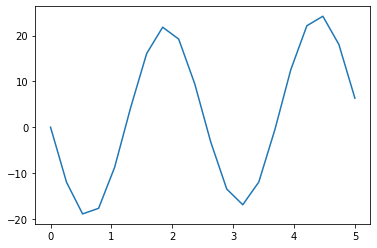

In [11]:
plt.plot(x, fx)
plt.show()

In [12]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [13]:
res = minimize(error, [0,5], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})
res

Optimization terminated successfully.
         Current function value: 242.826683
         Iterations: 147
         Function evaluations: 270


 final_simplex: (array([[2.0914489 , 5.05960344],
       [2.09144796, 5.05960326],
       [2.09144927, 5.05960302]]), array([242.82668279, 242.82668622, 242.82668648]))
           fun: 242.82668278842368
       message: 'Optimization terminated successfully.'
          nfev: 270
           nit: 147
        status: 0
       success: True
             x: array([2.0914489 , 5.05960344])

In [14]:
res = differential_evolution(error, [(0, 5), (-5, 5)], disp=True)
res

differential_evolution step 1: f(x)= 126.255
differential_evolution step 2: f(x)= 126.255
differential_evolution step 3: f(x)= 93.5106
differential_evolution step 4: f(x)= 79.5102
differential_evolution step 5: f(x)= 63.5448
differential_evolution step 6: f(x)= 42.5932
differential_evolution step 7: f(x)= 42.5932
differential_evolution step 8: f(x)= 3.66266
differential_evolution step 9: f(x)= 3.66266
differential_evolution step 10: f(x)= 3.66266
differential_evolution step 11: f(x)= 3.23461
differential_evolution step 12: f(x)= 3.23461
differential_evolution step 13: f(x)= 2.04484
differential_evolution step 14: f(x)= 2.04484
differential_evolution step 15: f(x)= 2.04484
differential_evolution step 16: f(x)= 1.42416
differential_evolution step 17: f(x)= 0.278126
differential_evolution step 18: f(x)= 0.213959
differential_evolution step 19: f(x)= 0.213959
differential_evolution step 20: f(x)= 0.213959
differential_evolution step 21: f(x)= 0.0854011
differential_evolution step 22: f(x)=

     fun: 1.510480807098702e-06
     jac: array([141.4496175 , 502.75709661])
 message: 'Optimization terminated successfully.'
    nfev: 1803
     nit: 57
 success: True
       x: array([ 3. , -2.5])

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [15]:
rv = np.random.randint(0, 20, size=50)
rv

array([19, 13,  7, 19, 15,  3,  9,  5, 17,  9,  3,  6, 13,  6, 18,  0,  1,
        4, 10, 12,  8, 18,  9,  4, 12, 16,  4,  3,  2,  1, 10,  0, 12,  2,
       11,  0, 10, 13, 11,  0,  3, 12, 19,  0,  9,  7, 14,  1, 10,  9])

In [16]:
a1 = np.array([])                                  # Массив для сохранения средних по выборкам

for number in range(1000):
    sample1 = np.random.randint(0, 20, size=50)    # На каждом цикле генерируем выборки размером 50
    a1 = np.append(a1, sample1.mean())             # Считаем среднее по каждой выборке и добавляем в массив средних

Text(0.5, 0, '$x$')

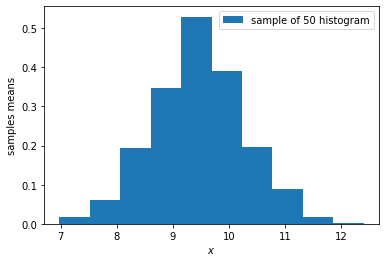

In [17]:
label_1 = 'sample of 50 histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [18]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [19]:
w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
